In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

url = '/content/AirQuality.csv'
data = pd.read_csv(url, sep=';', decimal=',')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

In [50]:
data.dropna(axis=1, how='all', inplace=True)
data.columns = ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')
data.set_index('Datetime', inplace=True)

# Feature selection
features = data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]

# Drop missing values
features_cleaned = features.dropna()

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features_cleaned)

target = np.random.choice([0, 1], size=len(features_cleaned))

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(features_cleaned, target, test_size=0.2, random_state=42)

# Elbow Method to find optimal k for KNN using cross-validation
mean_accuracies = []
k_range = range(1, 61)  # You can test k from 1 to 20 or a higher range

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_accuracies.append(np.mean(accuracies))


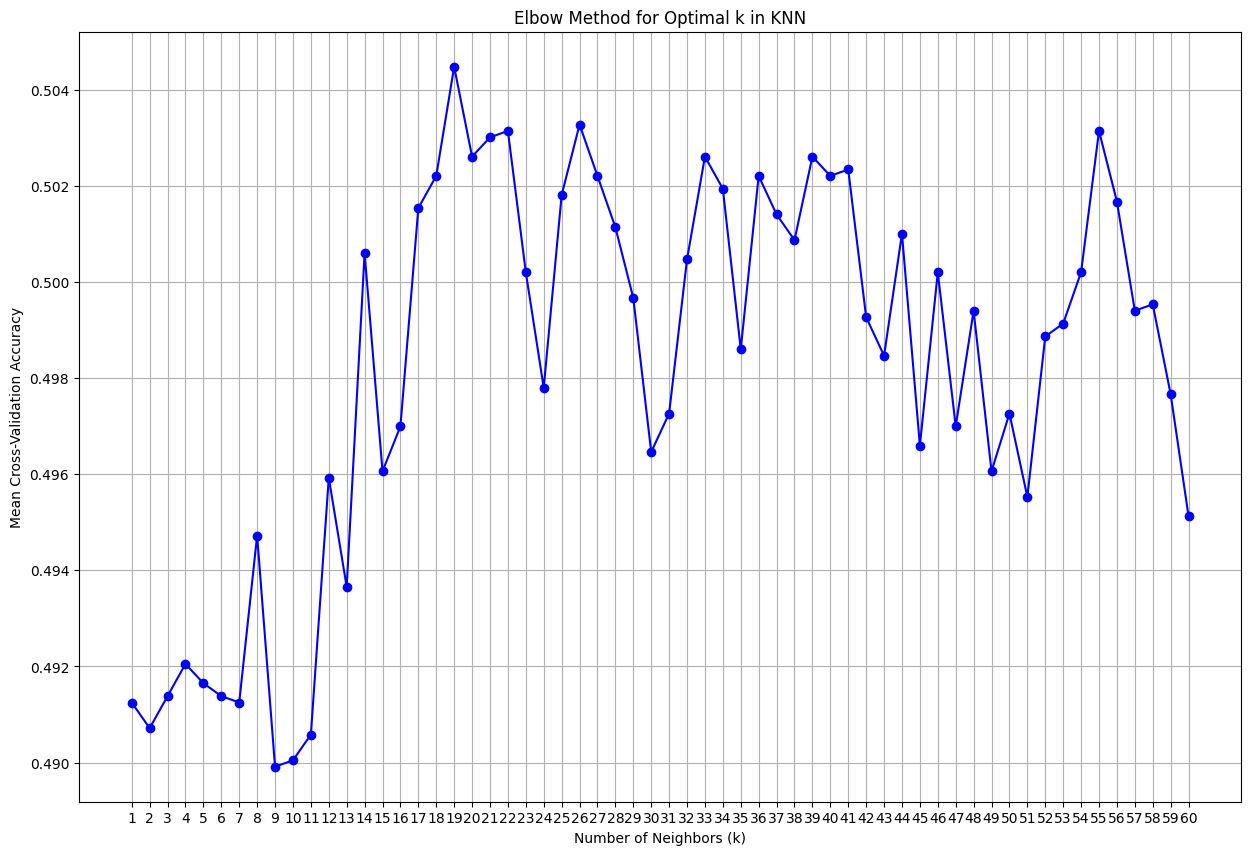

In [51]:
# Plot the elbow method (accuracy vs. k)
plt.figure(figsize=(15, 10))
plt.plot(k_range, mean_accuracies, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [52]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_cleaned)

target = np.random.choice([0, 1], size=len(features_cleaned))

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Elbow Method to find optimal k for KNN using cross-validation
c_mean_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  # 5-fold cross-validation
    c_mean_accuracies.append(np.mean(accuracies))

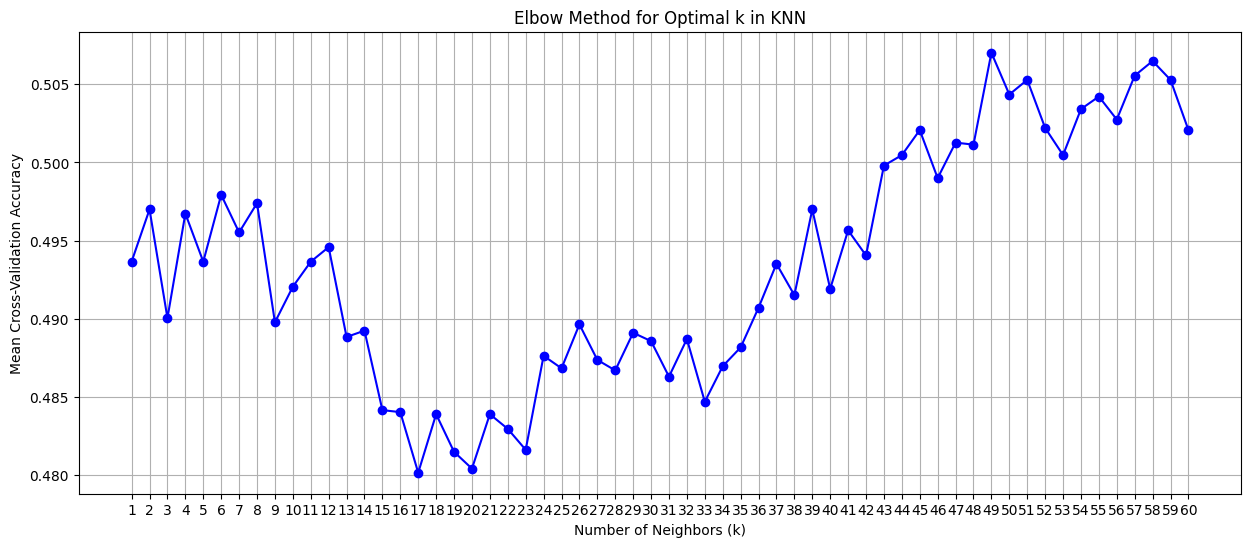

In [53]:
# Plot the elbow method (accuracy vs. k)
plt.figure(figsize=(15, 6))
plt.plot(k_range, c_mean_accuracies, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [54]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_cleaned)

target = np.random.choice([0, 1], size=len(features_cleaned))

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Elbow Method to find optimal k for KNN using cross-validation
accuracy_scores = []

# Loop through the range of k values and compute the accuracy for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    accuracy_scores.append(accuracies)



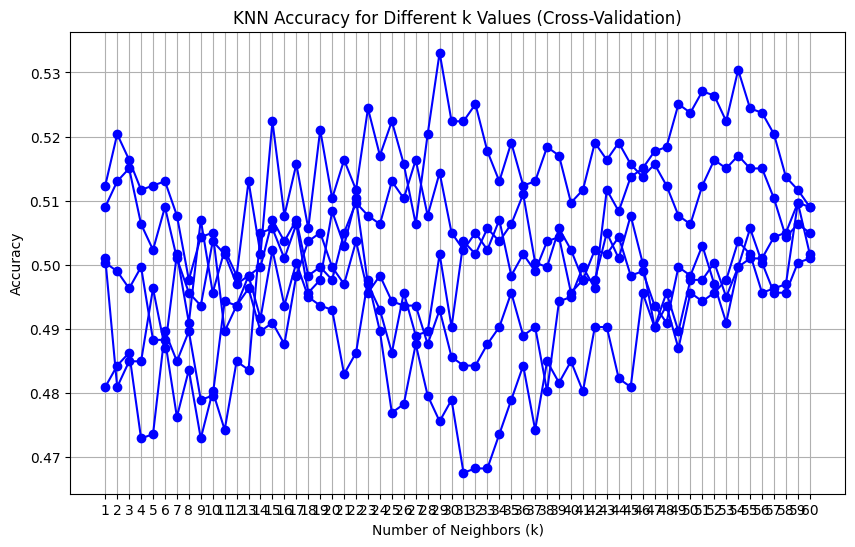

In [55]:
# Plot the elbow method (accuracy vs. k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different k Values (Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [56]:
# Calculate the first derivative (difference between consecutive accuracies)
accuracies_diff = np.diff(mean_accuracies)

# Find the index of the largest difference in accuracy
elbow_point = np.argmax(accuracies_diff) + 1  # Adding 1 because diff reduces the length by 1
print(f"The optimal k (elbow point) is: {elbow_point}")

The optimal k (elbow point) is: 13


In [57]:
# Find the optimal k (the one with the highest mean accuracy)
optimal_k = np.argmax(accuracies_diff) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

# Train KNN with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = knn_optimal.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optionally, you can also make predictions on the test set
y_pred = knn_optimal.predict(X_test)

Optimal number of neighbors (k): 13
Test Accuracy: 0.5085


In [58]:
# Calculate the first derivative (difference between consecutive accuracies)
accuracies_diff = np.diff(c_mean_accuracies)

# Find the index of the largest difference in accuracy
elbow_point = np.argmax(accuracies_diff) + 1  # Adding 1 because diff reduces the length by 1
print(f"The optimal k (elbow point) is: {elbow_point}")

The optimal k (elbow point) is: 3


In [59]:
# Find the optimal k (the one with the highest mean accuracy)
optimal_k = np.argmax(accuracies_diff) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

# Train KNN with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = knn_optimal.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optionally, you can also make predictions on the test set
y_pred = knn_optimal.predict(X_test)

Optimal number of neighbors (k): 3
Test Accuracy: 0.5134
